In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.57G/3.58G [00:50<00:00, 16.2MB/s]
100% 3.58G/3.58G [00:50<00:00, 75.9MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [32]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [22]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [24]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
from keras import Sequential
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,813,638 (64.14 MB)

 Trainable params: 2,098,950 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
conv_base.trainable=False

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data
train_gen = datagen.flow_from_directory(
    directory="/content/dataset/train",
    target_size=(150,150),
    batch_size=32,
    class_mode="sparse",
    subset="training"
)

# Validation data
val_gen = datagen.flow_from_directory(
    directory="/content/dataset/train",
    target_size=(150,150),
    batch_size=32,
    class_mode="sparse",
    subset="validation"
)


Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
history=model.fit(train_gen,epochs=10,validation_data=val_gen)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 116s 414ms/step - accuracy: 0.6804 - loss: 0.8961 - val_accuracy: 0.8907 - val_loss: 0.3126
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 107s 391ms/step - accuracy: 0.8727 - loss: 0.3339 - val_accuracy: 0.9238 - val_loss: 0.2277
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 141s 388ms/step - accuracy: 0.8994 - loss: 0.2776 - val_accuracy: 0.9334 - val_loss: 0.1793
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 107s 394ms/step - accuracy: 0.9086 - loss: 0.2442 - val_accuracy: 0.9518 - val_loss: 0.1366
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 125s 458ms/step - accuracy: 0.9216 - loss: 0.2139 - val_accuracy: 0.9486 - val_loss: 0.1489
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 110s 403ms/step - accuracy: 0.9096 - loss: 0.2358 - val_accuracy: 0.9284 - val_loss: 0.1832
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 107s 391ms/step - accuracy: 0.9279 - loss: 0.1954 - val_accuracy: 0.9403 - val_loss: 0.1558
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 106s 388ms/step - accuracy: 0.9261 -

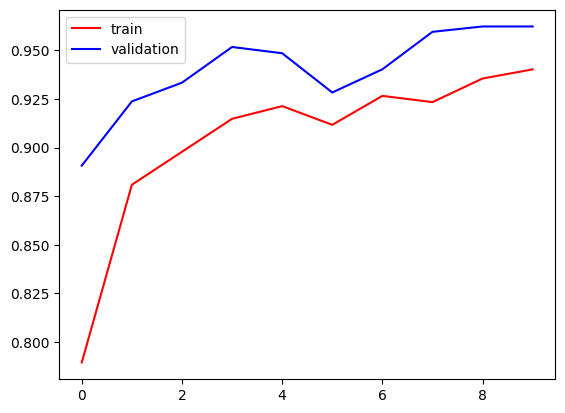

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [75]:
import numpy as np
from tensorflow.keras.preprocessing import image
img_path = "/content/rotten.webp"
img = image.load_img(img_path, target_size=(150,150))


img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


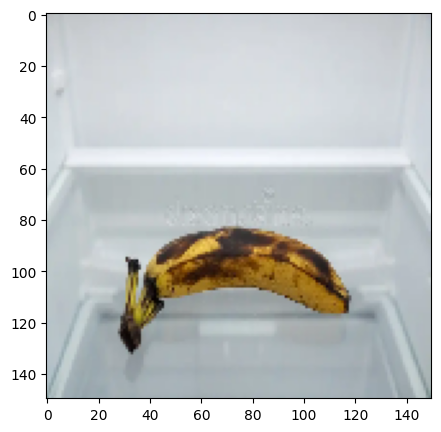

In [81]:
plt.figure(figsize=(5,5))
plt.imshow(img)

In [82]:
pred = model.predict(img_array)

class_names = ['freshapples','freshbanana','freshoranges',
               'rottenapples','rottenbanana','rottenoranges']

print("Predicted Class Name:", class_names[pred_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class Name: rottenbanana
